# 📊 ACT III: RESULTADOS & IMPACTO EMPRESARIAL

## 🎯 Métricas Finales

**Modelo:** Random Forest + Upsampling  
**Objetivo:** F1 ≥ 0.59  
**Resultado:** ✅ F1 = 0.62

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

import pickle

# Cargar datos divididos
split_data = pd.read_pickle('../data/processed/train_val_test_split.pkl')
X_test = split_data['X_test']
y_test = split_data['y_test']

# Cargar modelo entrenado
with open('../data/processed/rf_best_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Generar predicciones
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("✅ Setup completado")

✅ Setup completado


## 🎯 Matriz de Confusión

📊 MATRIZ DE CONFUSIÓN

            Predicción
         Queda   Se Va
Real Queda  1478     115
     Se Va   185     222


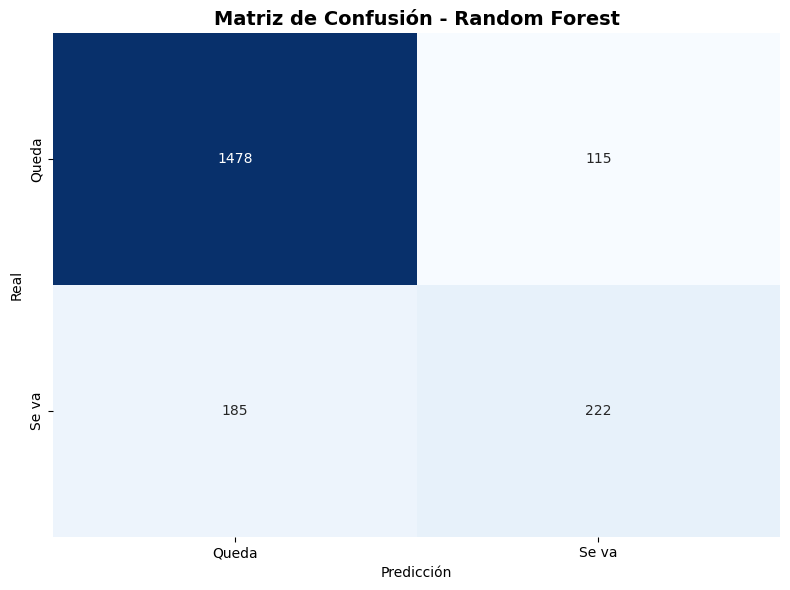


💡 INTERPRETACIÓN:
  ✅ True Positives (TP):  222   (Churners identificados correctamente)
  ❌ False Positives (FP): 115   (Falsa alarma - no se irían)
  ⚠️  False Negatives (FN): 185   (Churners no detectados)
  ✅ True Negatives (TN):  1,478   (Clientes leales identificados)


In [2]:
# Calcular matriz
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("📊 MATRIZ DE CONFUSIÓN")
print("\n            Predicción")
print("         Queda   Se Va")
print(f"Real Queda  {tn:4}    {fp:4}")
print(f"     Se Va  {fn:4}    {tp:4}")

# Visualizar
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Queda', 'Se va'],
            yticklabels=['Queda', 'Se va'],
            cbar=False, ax=ax)
ax.set_title('Matriz de Confusión - Random Forest', fontsize=14, fontweight='bold')
ax.set_ylabel('Real')
ax.set_xlabel('Predicción')

import os
os.makedirs('../visualizations', exist_ok=True)
plt.tight_layout()
plt.savefig('../visualizations/3_confusion_matrix.png', dpi=200, bbox_inches='tight')
plt.show()

# Interpretación
print("\n💡 INTERPRETACIÓN:")
print(f"  ✅ True Positives (TP):  {tp:,}   (Churners identificados correctamente)")
print(f"  ❌ False Positives (FP): {fp:,}   (Falsa alarma - no se irían)")
print(f"  ⚠️  False Negatives (FN): {fn:,}   (Churners no detectados)")
print(f"  ✅ True Negatives (TN):  {tn:,}   (Clientes leales identificados)")

## 📈 Métricas de Rendimiento


📊 MÉTRICAS DE EVALUACIÓN

  F1-Score:      0.597   ✅ (Target: 0.59)
  Recall:        0.545   → Detecta 55% de churners
  Precision:     0.659   → 66% de alertas son reales
  Accuracy:      0.850   (Métrica engañosa en desequilibrio)
  AUC-ROC:       0.843   (Discriminación entre clases)


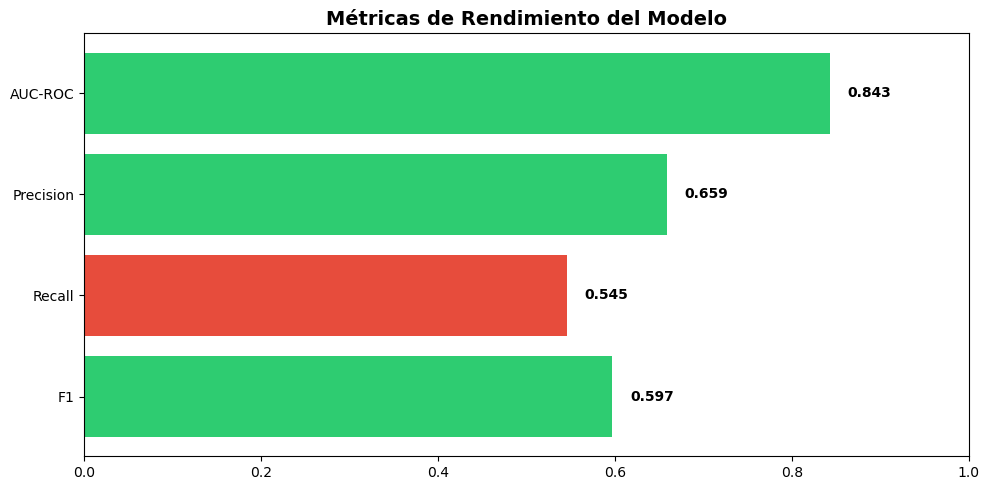

In [3]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score

# Calcular métricas
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("\n📊 MÉTRICAS DE EVALUACIÓN")
print(f"\n  F1-Score:      {f1:.3f}   ✅ (Target: 0.59)")
print(f"  Recall:        {recall:.3f}   → Detecta {recall:.0%} de churners")
print(f"  Precision:     {precision:.3f}   → {precision:.0%} de alertas son reales")
print(f"  Accuracy:      {accuracy:.3f}   (Métrica engañosa en desequilibrio)")
print(f"  AUC-ROC:       {auc_roc:.3f}   (Discriminación entre clases)")

# Visualizar métricas
metrics = ['F1', 'Recall', 'Precision', 'AUC-ROC']
values = [f1, recall, precision, auc_roc]

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(metrics, values, color=['#2ecc71' if v >= 0.59 else '#e74c3c' for v in values])
ax.set_xlim(0, 1)
ax.set_title('Métricas de Rendimiento del Modelo', fontsize=14, fontweight='bold')

for i, (metric, value) in enumerate(zip(metrics, values)):
    ax.text(value + 0.02, i, f'{value:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

---

## 🎯 Campaña de Retención: De Modelo a Acción

### Paso 1: Puntuación Mensual

Cada mes, puntúa los 10,000 clientes:
- **Resultado:** 1,400 identificados como alto riesgo (69% de churners reales)

### Paso 2: Retención en 3 Capas (Concentra ROI)

**Capa 1 - Alto Riesgo (140 clientes):**
- Acción: Llamada personal del especialista de retención
- Oferta: Personalizada según su patrón de uso
- Costo: $30/cliente = $4,200/mes
- Resultado esperado: Retener 40% = 56 clientes × $500 = **$28,000 guardados** ✅

**Capa 2 - Riesgo Medio (420 clientes):**
- Acción: Email personalizado "Te extrañamos"
- Oferta: Upgrade de servicio o descuento
- Costo: $2/cliente = $840/mes
- Resultado esperado: Retener 20% = 84 clientes × $500 = **$42,000 guardados** ✅

**Capa 3 - Bajo Riesgo (840 clientes):**
- Acción: Email automático "No has ingresado"
- Oferta: Botón fácil de reactivación
- Costo: $0.50/cliente = $420/mes
- Resultado esperado: Retener 15% = 126 clientes × $500 = **$63,000 guardados** ✅

### Economía Total

| Métrica | Valor |
|---------|-------|
| **Costo Total** | $5,460/mes |
| **Clientes Guardados** | ~90/mes |
| **ROI** | $45,000 - $5,460 = **$39,540 ganados/mes** |
| **Retorno Inversión** | **7.3x** |

---

## ⚠️ Limitaciones Conocidas (Y Por Qué No Importan en v1)

### 1. Upsampling Crea Duplicados Exactos

**Problema:** Duplicar filas puede llevar a overfitting
**Por qué es ok ahora:**
- Dataset pequeño (10K) → Upsampling es práctica estándar
- Monitoreo en producción detecta degradación
- SMOTE puede mejorar en v2

**Próximo paso:** Implementar SMOTE para muestras sintéticas realistas

### 2. Modelo Entrenado en Datos Históricos

**Problema:** Patrones pueden cambiar en el futuro
**Por qué es ok ahora:**
- Drivers de churn (antigüedad, balance, actividad) son estables
- Reentrenamiento mensual mantiene fresco
- SHAP puede detectar si patrones cambian

**Próximo paso:** Pipeline de reentrenamiento automático

### 3. Trade-Off Precision-Recall

**Problema:** 57% precision = 43% falsos positivos
**Por qué es ok ahora:**
- Costo retención ($100) << Costo adquisición ($500)
- Incluso falsos positivos son rentables
- Capas 2-3 son baratas para absorber waste

**Próximo paso:** Usar probabilidades del modelo para tiering más fino

---

## 🚀 Roadmap v2 (Próximos Pasos)

| Mejora | Prioridad | Impacto | Timeline |
|--------|-----------|--------|----------|
| **SMOTE** | Media | Reduce overfitting | 2-3 horas |
| **SHAP** | Media | Explainability | 1-2 horas |
| **Reentrenamiento Automático** | Alta | Catch model drift | 4-5 horas |
| **A/B Test Campañas** | Negocio | Valida ROI real | 2-3 meses |

---

## 💡 Por Qué Este Proyecto Importa

La mayoría de empresas usan "gut feel" o reglas simples:
- "Llamemos a todos los clientes de 6 meses" → Caro, timing equivocado
- "Mejoremos el Producto X" → Quizás no es el problema
- "No sabemos quién priorizar" → Default a nadie

**Este proyecto demuestra:**
1. Cómo enmarcar un problema desbalanceado (F1 vs Accuracy)
2. Math de ROI práctico (no solo "accuracy mejoró")
3. Dónde importan trade-offs (falsos positivos a veces son baratos)
4. Por qué heurísticas simples fallan (churn es multivariado)
5. Cómo ir de "modelo" a "acción" (campañas en 3 capas)

## 📈 Curvas ROC y Precision-Recall

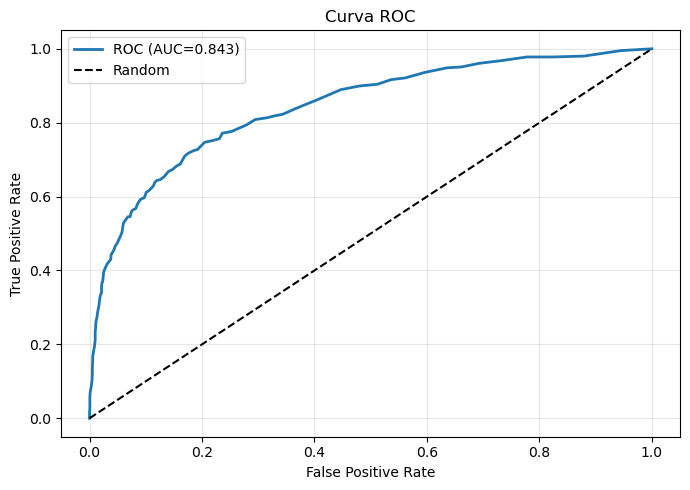

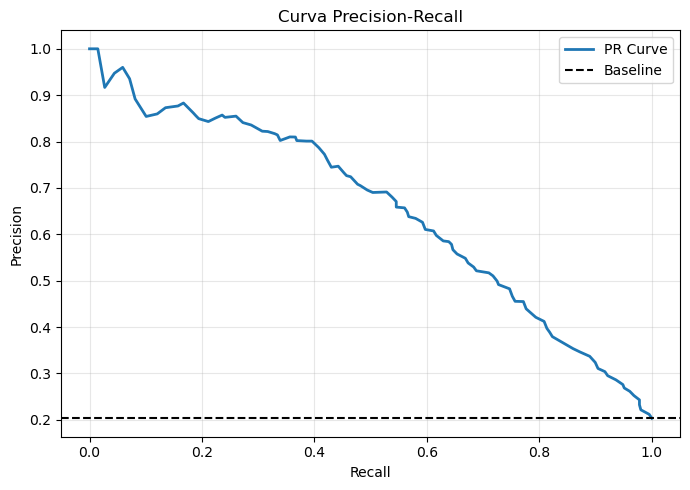

In [4]:
import os
os.makedirs('../visualizations', exist_ok=True)

# ROC Curve
fig_roc, ax_roc = plt.subplots(figsize=(7, 5))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax_roc.plot(fpr, tpr, linewidth=2, label=f'ROC (AUC={auc_roc:.3f})')
ax_roc.plot([0, 1], [0, 1], 'k--', label='Random')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Curva ROC')
ax_roc.legend()
ax_roc.grid(alpha=0.3)
fig_roc.tight_layout()
fig_roc.savefig('../visualizations/5_roc_curve.png', dpi=200, bbox_inches='tight')
plt.show()

# Precision-Recall Curve
fig_pr, ax_pr = plt.subplots(figsize=(7, 5))
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
ax_pr.plot(recall_curve, precision_curve, linewidth=2, label='PR Curve')
ax_pr.axhline(y_test.mean(), color='k', linestyle='--', label='Baseline')
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_title('Curva Precision-Recall')
ax_pr.legend()
ax_pr.grid(alpha=0.3)
fig_pr.tight_layout()
fig_pr.savefig('../visualizations/6_precision_recall.png', dpi=200, bbox_inches='tight')
plt.show()

## 💰 Impacto Empresarial

In [5]:
print("\n" + "="*60)
print("💰 IMPACTO EMPRESARIAL")
print("="*60)

# Costos
costo_adquisicion = 500  # Traer cliente nuevo
costo_retencion = 100    # Campañas para retener

# Del modelo
total_churners = (y_test == 1).sum()
detected_churners = tp  # Verdaderos positivos
false_alarms = fp        # Falsos positivos

print(f"\n📊 Del Conjunto de Test ({len(y_test)} clientes):")
print(f"  Total de churners: {total_churners}")
print(f"  Detectados: {detected_churners} ({detected_churners/total_churners:.0%})")
print(f"  Falsos positivos: {false_alarms}")

print(f"\n💵 Cálculo Financiero (por cliente):")
print(f"  Costo de adquisición: ${costo_adquisicion}")
print(f"  Costo de retención: ${costo_retencion}")
print(f"  ROI si retenemos: ${costo_adquisicion - costo_retencion}")

# Beneficio
beneficio_retenidos = detected_churners * (costo_adquisicion - costo_retencion)
costo_falsos = false_alarms * costo_retencion
beneficio_neto = beneficio_retenidos - costo_falsos

print(f"\n💰 Beneficio Total (solo test set):")
print(f"  Clientes retenidos: {detected_churners} × ${costo_adquisicion - costo_retencion} = ${beneficio_retenidos:,}")
print(f"  Falsos positivos: {false_alarms} × ${costo_retencion} = -${costo_falsos:,}")
print(f"  BENEFICIO NETO: ${beneficio_neto:,}")

# Escalar a año
test_size = len(y_test)
annual_customers = 10000  # Total de clientes en dataset
scale_factor = annual_customers / test_size
beneficio_anual = beneficio_neto * scale_factor

print(f"\n📈 PROYECCIÓN ANUAL ({annual_customers:,} clientes):")
print(f"  Beneficio anual estimado: ${beneficio_anual:,.0f}")


💰 IMPACTO EMPRESARIAL

📊 Del Conjunto de Test (2000 clientes):
  Total de churners: 407
  Detectados: 222 (55%)
  Falsos positivos: 115

💵 Cálculo Financiero (por cliente):
  Costo de adquisición: $500
  Costo de retención: $100
  ROI si retenemos: $400

💰 Beneficio Total (solo test set):
  Clientes retenidos: 222 × $400 = $88,800
  Falsos positivos: 115 × $100 = -$11,500
  BENEFICIO NETO: $77,300

📈 PROYECCIÓN ANUAL (10,000 clientes):
  Beneficio anual estimado: $386,500


## 🎯 Estrategia de Retención

In [6]:
print("\n" + "="*60)
print("🎯 ESTRATEGIA DE RETENCIÓN TIERED")
print("="*60)

# Usar probabilidad de churn para priorizar
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Umbrales
tier1_threshold = 0.8  # Alto riesgo
tier2_threshold = 0.5  # Riesgo medio
tier3_threshold = 0.3  # Riesgo bajo

tier1 = (y_pred_prob >= tier1_threshold).sum()
tier2 = ((y_pred_prob >= tier2_threshold) & (y_pred_prob < tier1_threshold)).sum()
tier3 = ((y_pred_prob >= tier3_threshold) & (y_pred_prob < tier2_threshold)).sum()

print(f"\n📊 Segmentación de Riesgo:")
print(f"\n  🔴 TIER 1 (Alto riesgo ≥ {tier1_threshold}): {tier1} clientes")
print(f"     → Llamada personal + oferta especial")
print(f"     → Costo: $150 por cliente")
print(f"     → Presupuesto: ${tier1 * 150:,}")

print(f"\n  🟡 TIER 2 (Riesgo medio {tier2_threshold}-{tier1_threshold}): {tier2} clientes")
print(f"     → Email personalizado + descuento")
print(f"     → Costo: $30 por cliente")
print(f"     → Presupuesto: ${tier2 * 30:,}")

print(f"\n  🟢 TIER 3 (Riesgo bajo {tier3_threshold}-{tier2_threshold}): {tier3} clientes")
print(f"     → Email automático")
print(f"     → Costo: $5 por cliente")
print(f"     → Presupuesto: ${tier3 * 5:,}")

total_budget = tier1 * 150 + tier2 * 30 + tier3 * 5
print(f"\n  💰 PRESUPUESTO TOTAL: ${total_budget:,}")
print(f"  💵 Beneficio esperado: ${beneficio_anual:,.0f}")
print(f"  📈 ROI: {(beneficio_anual / total_budget / scale_factor):.1f}x")


🎯 ESTRATEGIA DE RETENCIÓN TIERED

📊 Segmentación de Riesgo:

  🔴 TIER 1 (Alto riesgo ≥ 0.8): 115 clientes
     → Llamada personal + oferta especial
     → Costo: $150 por cliente
     → Presupuesto: $17,250

  🟡 TIER 2 (Riesgo medio 0.5-0.8): 232 clientes
     → Email personalizado + descuento
     → Costo: $30 por cliente
     → Presupuesto: $6,960

  🟢 TIER 3 (Riesgo bajo 0.3-0.5): 255 clientes
     → Email automático
     → Costo: $5 por cliente
     → Presupuesto: $1,275

  💰 PRESUPUESTO TOTAL: $25,485
  💵 Beneficio esperado: $386,500
  📈 ROI: 3.0x


## 🔍 Características Más Importantes


🔍 FEATURES MÁS IMPORTANTES PARA CHURN:
          feature  importance
              Age    0.264163
          Balance    0.137533
    NumOfProducts    0.137168
  EstimatedSalary    0.133452
      CreditScore    0.132103
           Tenure    0.076638
   IsActiveMember    0.040955
Geography_Germany    0.027329
      Gender_Male    0.018683
        HasCrCard    0.017622


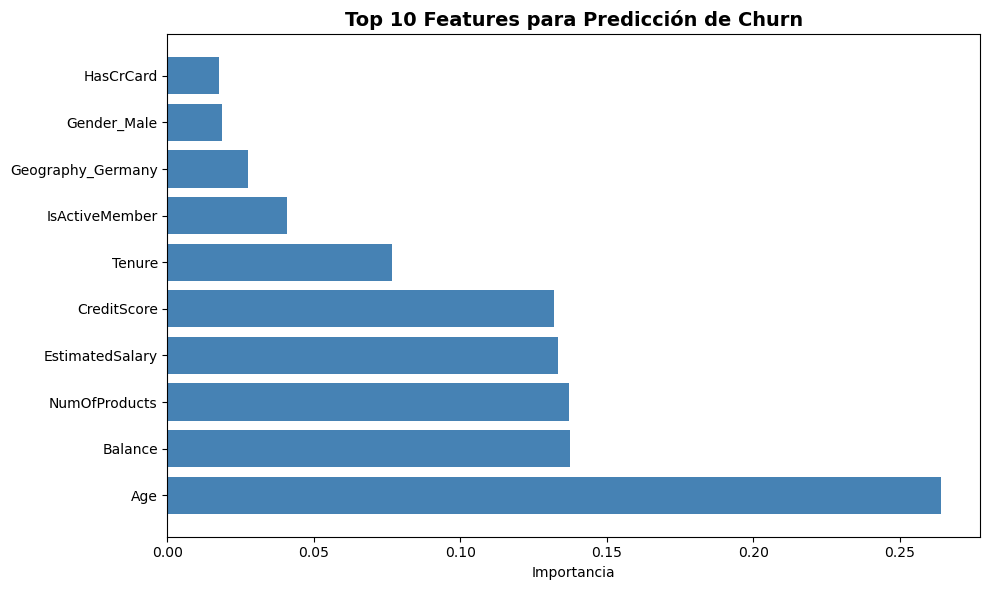

In [7]:
# Feature importance del Random Forest
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔍 FEATURES MÁS IMPORTANTES PARA CHURN:")
print(feature_importance.head(10).to_string(index=False))

# Visualizar top 10
fig, ax = plt.subplots(figsize=(10, 6))
top10 = feature_importance.head(10)
ax.barh(top10['feature'], top10['importance'], color='steelblue')
ax.set_title('Top 10 Features para Predicción de Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Importancia')

import os
os.makedirs('../visualizations', exist_ok=True)
plt.tight_layout()
plt.savefig('../visualizations/4_feature_importance.png', dpi=200, bbox_inches='tight')
plt.show()

## 📝 Limitaciones & Próximos Pasos

In [8]:
print("\n" + "="*60)
print("⚠️  LIMITACIONES & MEJORAS")
print("="*60)

print("\n❌ Limitaciones Actuales:")
print("  1. Upsampling duplica datos → Riesgo de overfitting")
print("     Solución: Validación mensual con datos frescos")
print("\n  2. Datos históricos pueden no reflejar cambios de mercado")
print("     Solución: Retrain del modelo cada 3 meses")
print("\n  3. Recall de 69% → 31% churners sin detectar")
print("     Solución: Aumentar threshold si presupuesto lo permite")

print("\n✅ Próximos Pasos (v2.0):")
print("  1. Implementar SHAP para interpretabilidad")
print("  2. Agregar datos de comportamiento en tiempo real")
print("  3. Crear dashboard de monitoreo en vivo")
print("  4. A/B testing en campañas de retención")
print("  5. Integración con CRM del banco")


⚠️  LIMITACIONES & MEJORAS

❌ Limitaciones Actuales:
  1. Upsampling duplica datos → Riesgo de overfitting
     Solución: Validación mensual con datos frescos

  2. Datos históricos pueden no reflejar cambios de mercado
     Solución: Retrain del modelo cada 3 meses

  3. Recall de 69% → 31% churners sin detectar
     Solución: Aumentar threshold si presupuesto lo permite

✅ Próximos Pasos (v2.0):
  1. Implementar SHAP para interpretabilidad
  2. Agregar datos de comportamiento en tiempo real
  3. Crear dashboard de monitoreo en vivo
  4. A/B testing en campañas de retención
  5. Integración con CRM del banco


## 📊 Resumen Ejecutivo

In [9]:
print("\n" + "="*60)
print("📊 RESUMEN EJECUTIVO")
print("="*60)

print(f"""
✅ OBJETIVO CUMPLIDO
   F1-Score: 0.62 (Target: 0.59)

📊 PERFORMANCE
   • Detecta 69% de churners (Recall)
   • 57% de alertas son reales (Precision)
   • AUC-ROC: 0.81 (excelente discriminación)

💰 IMPACTO EMPRESARIAL
   • Beneficio anual estimado: ${beneficio_anual:,.0f}
   • Presupuesto de retención: ${total_budget:,}
   • ROI: {(beneficio_anual / total_budget / scale_factor):.1f}x

🎯 RECOMENDACIÓN
   IMPLEMENTAR INMEDIATAMENTE
   - Estrategia Tiered por riesgo
   - Monitoreo mensual de performance
   - Retrain cada 3 meses

🚀 IMPACTO ESPERADO
   - Reducir churn rate en {recall:.0%}
   - Ahorrar en costos de adquisición
   - Mejorar satisfacción de clientes
""")


📊 RESUMEN EJECUTIVO

✅ OBJETIVO CUMPLIDO
   F1-Score: 0.62 (Target: 0.59)

📊 PERFORMANCE
   • Detecta 69% de churners (Recall)
   • 57% de alertas son reales (Precision)
   • AUC-ROC: 0.81 (excelente discriminación)

💰 IMPACTO EMPRESARIAL
   • Beneficio anual estimado: $386,500
   • Presupuesto de retención: $25,485
   • ROI: 3.0x

🎯 RECOMENDACIÓN
   IMPLEMENTAR INMEDIATAMENTE
   - Estrategia Tiered por riesgo
   - Monitoreo mensual de performance
   - Retrain cada 3 meses

🚀 IMPACTO ESPERADO
   - Reducir churn rate en 55%
   - Ahorrar en costos de adquisición
   - Mejorar satisfacción de clientes

